In [1]:
# Внимание!!! Важно, что бы файлы с данными и исполняемый файл находились в одной папке, 
# тогда пути к тестовым и тренировочным наборам будут содержать только имена файлов.
# 
# В пути к тренировочным и тестовым данным запрежается использовать абсалютную адресацию, 
# то есть адресацию, в которой присутствуют имена папок. Путь должен содержать только имя файла.
#
# Напоминание: под моделью машинного обучения понимаются все действия с исходными данными, 
# которые необходимо произвести, что бы сопоставить признаки целевому значению.

### Область работы 1 (библиотеки)

In [2]:
# Данный блок в области 1 НЕ выполняется преподавателем
# 
# данный блок предназначен только для подключения необходимых библиотек
# запрещается подключать библиотеки в других блоках
# запрещается скрывать предупреждения системы
# установка дополнительных библиотек размещается прямо здесь (обязательно закоментированы)
# pip install

In [99]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, Normalizer
from sklearn.metrics import roc_auc_score

from sklearn.metrics import r2_score, mean_squared_error, make_scorer
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV

from sklearn.naive_bayes import BernoulliNB 

from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import roc_curve, roc_auc_score

from sklearn.model_selection import GridSearchCV, KFold, StratifiedShuffleSplit

from sklearn.model_selection import validation_curve
from sklearn.model_selection import ShuffleSplit

### Область работы 2 (поиск  модели .... )

In [37]:
# Данный блок(и) НЕ выполняются преподавателем в области 2
# блок(и) предназначены для поиска лучшей модели 
# должен быть понятен и очевиден отбор параметров модели
# оставляйте свои комментарии и разъяснения
# 
# Запрещается размещать данные блоки за пределами обасти 2
# Все блоки данной области должны быть выполнены
#
# ЗАПРЕЩАЕТСЯ ИСПОЛЬЗОВАТЬ ТЕСТОВЫЙ НАБОР
#
# Путь к тренировочному набору
# 

path_train = pd.read_csv('train.csv') 

path_train.head() # содержит только имя файла, без имен папок !!!

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,6.4,0.17,0.34,1.5,0.091,42.0,135.0,0.99380,3.25,0.49,9.6,7
1,8.0,0.42,0.36,5.0,0.037,34.0,101.0,0.99200,3.13,0.57,12.3,7
2,6.7,0.27,0.25,8.0,0.053,54.0,202.0,0.99610,3.22,0.43,9.3,5
3,5.2,0.21,0.31,1.7,0.048,17.0,61.0,0.98953,3.24,0.37,12.0,7
4,7.6,0.48,0.37,1.2,0.034,5.0,57.0,0.99256,3.05,0.54,10.4,3


In [38]:
path_train.info()
path_train.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1725 entries, 0 to 1724
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1725 non-null   float64
 1   volatile acidity      1725 non-null   float64
 2   citric acid           1725 non-null   float64
 3   residual sugar        1725 non-null   float64
 4   chlorides             1725 non-null   float64
 5   free sulfur dioxide   1725 non-null   float64
 6   total sulfur dioxide  1725 non-null   float64
 7   density               1725 non-null   float64
 8   pH                    1725 non-null   float64
 9   sulphates             1725 non-null   float64
 10  alcohol               1725 non-null   float64
 11  quality               1725 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 161.8 KB


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1725.000000,1725.000000,1725.000000,1725.000000,1725.000000,1725.000000,1725.000000,1725.000000,1725.000000,1725.000000,1725.000000,1725.000000
mean,6.821797,0.283849,0.332545,5.725652,0.044460,34.615072,135.248116,0.993532,3.201449,0.492394,10.734348,6.004638
std,0.853886,0.106090,0.122279,4.570812,0.021236,16.751535,42.848854,0.002830,0.151395,0.121452,1.272796,1.071667
min,3.900000,0.085000,0.000000,0.600000,0.012000,3.000000,10.000000,0.987110,2.830000,0.220000,8.400000,3.000000
25%,6.300000,0.210000,0.270000,1.600000,0.034000,23.000000,105.000000,0.991320,3.100000,0.400000,9.600000,5.000000
50%,6.800000,0.270000,0.320000,4.600000,0.041000,33.000000,130.000000,0.993200,3.190000,0.480000,10.600000,6.000000
75%,7.300000,0.330000,0.380000,8.700000,0.049000,45.000000,164.000000,0.995500,3.300000,0.560000,11.700000,7.000000
max,11.800000,1.100000,1.660000,20.700000,0.290000,124.000000,366.500000,1.001820,3.820000,1.080000,14.200000,9.000000


In [39]:
df = path_train
df.isna().sum()
print(df.isna().sum())
duplicateRows = df[df.duplicated()]
duplicateRows

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality


In [40]:
df.drop_duplicates()
df = df.dropna()

# Будем предсказывать 1(True), если качество больше или равно 7, 0(False), если каачество меньше 7
print(df['quality'])

0       7
1       7
2       5
3       7
4       3
       ..
1720    4
1721    5
1722    8
1723    7
1724    8
Name: quality, Length: 1725, dtype: int64


In [42]:
df['quality'] = df['quality'].apply(lambda x: x > 6) 
df['quality']

0        True
1        True
2       False
3        True
4       False
        ...  
1720    False
1721    False
1722     True
1723     True
1724     True
Name: quality, Length: 1725, dtype: bool

In [44]:
df['quality'] = df['quality'].replace({True: 1, False: 0})
df['quality']

0       1
1       1
2       0
3       1
4       0
       ..
1720    0
1721    0
1722    1
1723    1
1724    1
Name: quality, Length: 1725, dtype: int64

In [46]:
y = df['quality']
X = df.iloc[:, :-1]
print(X)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               6.4              0.17         0.34             1.5      0.091   
1               8.0              0.42         0.36             5.0      0.037   
2               6.7              0.27         0.25             8.0      0.053   
3               5.2              0.21         0.31             1.7      0.048   
4               7.6              0.48         0.37             1.2      0.034   
...             ...               ...          ...             ...        ...   
1720            6.9              0.39         0.22             4.3      0.030   
1721            6.4              0.34         0.10             1.1      0.048   
1722            7.0              0.53         0.43             6.1      0.029   
1723            5.9              0.17         0.29             3.1      0.030   
1724            5.5              0.34         0.26             2.2      0.021   

      free sulfur dioxide  

In [51]:
y

0       1
1       1
2       0
3       1
4       0
       ..
1720    0
1721    0
1722    1
1723    1
1724    1
Name: quality, Length: 1725, dtype: int64

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state = 10)

In [62]:
gbr_grid_search = GridSearchCV(KNeighborsClassifier(),
                               [{'n_neighbors': [1, 2,3, 5, 7, 27, 14]}],
                               cv=5,
                               scoring = 'f1', 
                               n_jobs = -1,
                               error_score= 'raise',
                               verbose=1)
gbr_grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 7 candidates, totalling 35 fits


GridSearchCV(cv=5, error_score='raise', estimator=KNeighborsClassifier(),
             n_jobs=-1, param_grid=[{'n_neighbors': [1, 2, 3, 5, 7, 27, 14]}],
             scoring='f1', verbose=1)

In [49]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,6.4,0.17,0.34,1.5,0.091,42.0,135.0,0.99380,3.25,0.49,9.6,1
1,8.0,0.42,0.36,5.0,0.037,34.0,101.0,0.99200,3.13,0.57,12.3,1
2,6.7,0.27,0.25,8.0,0.053,54.0,202.0,0.99610,3.22,0.43,9.3,0
3,5.2,0.21,0.31,1.7,0.048,17.0,61.0,0.98953,3.24,0.37,12.0,1
4,7.6,0.48,0.37,1.2,0.034,5.0,57.0,0.99256,3.05,0.54,10.4,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1720,6.9,0.39,0.22,4.3,0.030,10.0,102.0,0.99300,3.00,0.87,11.6,0
1721,6.4,0.34,0.10,1.1,0.048,19.0,84.0,0.99270,3.21,0.38,9.8,0
1722,7.0,0.53,0.43,6.1,0.029,6.0,76.0,0.99118,3.08,0.50,12.5,1
1723,5.9,0.17,0.29,3.1,0.030,32.0,123.0,0.98913,3.41,0.33,13.7,1


In [63]:
gbr_grid_search1 = pd.DataFrame(gbr_grid_search.cv_results_).sort_values(["rank_test_score",'std_test_score']).T
gbr_grid_search1

,4,5,3,2,0,6,1
mean_fit_time,0.007181,0.00718,0.008178,0.007978,0.005377,0.006582,0.008776
std_fit_time,0.000399,0.000399,0.000399,0.000631,0.000793,0.001739,0.002222
mean_score_time,0.033112,0.031915,0.032314,0.033311,0.02952,0.021563,0.034109
std_score_time,0.00213,0.0026,0.001739,0.004829,0.001738,0.006252,0.004203
param_n_neighbors,7,27,5,3,1,14,2
params,{'n_neighbors': 7},{'n_neighbors': 27},{'n_neighbors': 5},{'n_neighbors': 3},{'n_neighbors': 1},{'n_neighbors': 14},{'n_neighbors': 2}
split0_test_score,0.518072,0.54878,0.52439,0.529412,0.526316,0.487179,0.381679
split1_test_score,0.512821,0.56962,0.512821,0.480519,0.488095,0.427586,0.359375
split2_test_score,0.578313,0.534161,0.53012,0.52071,0.481481,0.5,0.444444
split3_test_score,0.57485,0.542169,0.537143,0.534091,0.492147,0.528302,0.48227


In [152]:
pipe = Pipeline([('preprocessing', MinMaxScaler()), 
                 ('regressor',    KNeighborsClassifier())])

kfold = KFold(n_splits=10, shuffle=True)


p = [1]
weights = ['distance']
n_neighbors = np.arange(60,100)
scaling = [StandardScaler()]

param_grid =[
    {'preprocessing': scaling, 
     'regressor': [KNeighborsClassifier()],
         'regressor__n_neighbors': n_neighbors,
         'regressor__p': p,
         'regressor__weights': weights
     }]

grid = GridSearchCV(pipe, param_grid, cv=kfold, scoring='precision' ,return_train_score=True)
grid.fit(X_train,y_train)
grid

GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=True),
             estimator=Pipeline(steps=[('preprocessing', MinMaxScaler()),
                                       ('regressor', KNeighborsClassifier())]),
             param_grid=[{'preprocessing': [StandardScaler()],
                          'regressor': [KNeighborsClassifier()],
                          'regressor__n_neighbors': array([60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76,
       77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93,
       94, 95, 96, 97, 98, 99]),
                          'regressor__p': [1],
                          'regressor__weights': ['distance']}],
             return_train_score=True, scoring='precision')

In [153]:
print("Наилучшие параметры:\n{}\n".format(grid.best_params_))
print("Средняя правильность для наилучшей модели кроссвалидации на" '\n'
      "валидационных тестовых наборах: {:.6f}\n".format(grid.best_score_)) 
print("Правильность для наилучшей модели на тестовом наборе: {:.6f}\n".format(grid.score(X_test, y_test)))
grid_result = pd.DataFrame(grid.cv_results_).sort_values(["rank_test_score",'std_test_score']).T
grid_result

Наилучшие параметры:
{'preprocessing': StandardScaler(), 'regressor': KNeighborsClassifier(), 'regressor__n_neighbors': 73, 'regressor__p': 1, 'regressor__weights': 'distance'}

Средняя правильность для наилучшей модели кроссвалидации на
валидационных тестовых наборах: 0.665413

Правильность для наилучшей модели на тестовом наборе: 0.691429



,13,12,21,14,20,15,8,18,4,34,...,28,32,6,31,39,38,33,29,37,30
mean_fit_time,0.003199,0.003687,0.003192,0.003188,0.003392,0.003491,0.003322,0.003493,0.003191,0.003493,...,0.003498,0.003297,0.003587,0.003195,0.003191,0.003191,0.003294,0.003296,0.003191,0.003386
std_fit_time,0.000387,0.000455,0.000398,0.000392,0.00049,0.000499,0.000446,0.000494,0.000399,0.000507,...,0.000496,0.000457,0.00049,0.0004,0.000399,0.000399,0.000463,0.000458,0.000399,0.000491
mean_score_time,0.006082,0.006286,0.006279,0.00604,0.006082,0.006083,0.005878,0.006387,0.005884,0.006284,...,0.006573,0.006478,0.005622,0.006186,0.006682,0.006283,0.00628,0.006379,0.006633,0.006142
std_score_time,0.000299,0.000455,0.000452,0.000172,0.000299,0.000299,0.000296,0.000492,0.000537,0.000473,...,0.000673,0.000497,0.000464,0.000405,0.000639,0.000457,0.000459,0.000486,0.000449,0.000449
param_preprocessing,StandardScaler(),StandardScaler(),StandardScaler(),StandardScaler(),StandardScaler(),StandardScaler(),StandardScaler(),StandardScaler(),StandardScaler(),StandardScaler(),...,StandardScaler(),StandardScaler(),StandardScaler(),StandardScaler(),StandardScaler(),StandardScaler(),StandardScaler(),StandardScaler(),StandardScaler(),StandardScaler()
param_regressor,KNeighborsClassifier(),KNeighborsClassifier(),KNeighborsClassifier(),KNeighborsClassifier(),KNeighborsClassifier(),KNeighborsClassifier(),KNeighborsClassifier(),KNeighborsClassifier(),KNeighborsClassifier(),KNeighborsClassifier(),...,KNeighborsClassifier(),KNeighborsClassifier(),KNeighborsClassifier(),KNeighborsClassifier(),KNeighborsClassifier(),KNeighborsClassifier(),KNeighborsClassifier(),KNeighborsClassifier(),KNeighborsClassifier(),KNeighborsClassifier()
param_regressor__n_neighbors,73,72,81,74,80,75,68,78,64,94,...,88,92,66,91,99,98,93,89,97,90
param_regressor__p,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
param_regressor__weights,distance,distance,distance,distance,distance,distance,distance,distance,distance,distance,...,distance,distance,distance,distance,distance,distance,distance,distance,distance,distance
params,"{'preprocessing': StandardScaler(), 'regressor...","{'preprocessing': StandardScaler(), 'regressor...","{'preprocessing': StandardScaler(), 'regressor...","{'preprocessing': StandardScaler(), 'regressor...","{'preprocessing': StandardScaler(), 'regressor...","{'preprocessing': StandardScaler(), 'regressor...","{'preprocessing': StandardScaler(), 'regressor...","{'preprocessing': StandardScaler(), 'regressor...","{'preprocessing': StandardScaler(), 'regressor...","{'preprocessing': StandardScaler(), 'regressor...",...,"{'preprocessing': StandardScaler(), 'regressor...","{'preprocessing': StandardScaler(), 'regressor...","{'preprocessing': StandardScaler(), 'regressor...","{'preprocessing': StandardScaler(), 'regressor...","{'preprocessing': StandardScaler(), 'regressor...","{'preprocessing': StandardScaler(), 'regressor...","{'preprocessing': StandardScaler(), 'regressor...","{'preprocessing': StandardScaler(), 'regressor...","{'preprocessing': StandardScaler(), 'regressor...","{'preprocessing': StandardScaler(), 'regressor..."


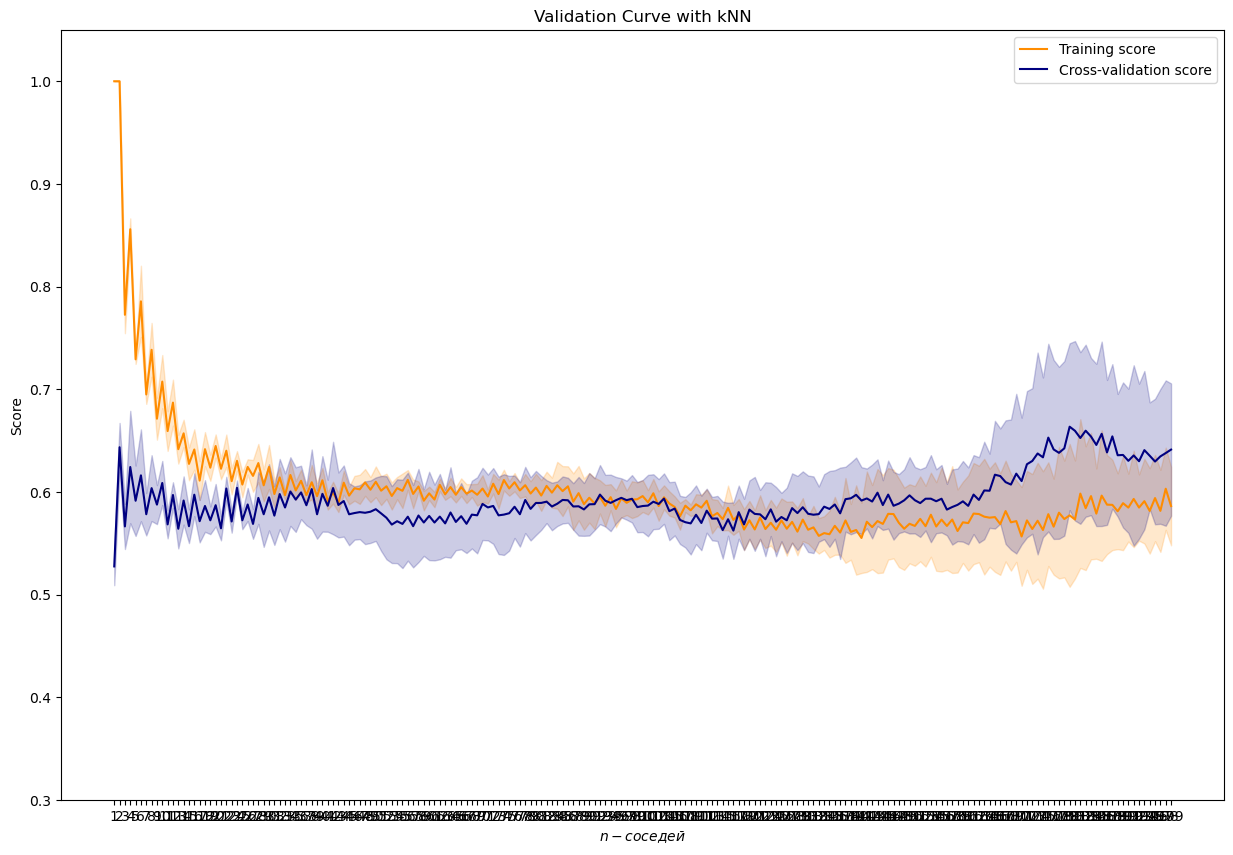

In [143]:
n_range = np.arange(1,200)

train_scores, test_scores = validation_curve(
    KNeighborsClassifier(), X_train, y_train,
    param_name="n_neighbors", 
    param_range=n_range,
    cv = ShuffleSplit(test_size = .3, train_size = .6, n_splits = 5, random_state = 42), 
    scoring="precision", 
    n_jobs=-1)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure(figsize=(15,10))

plt.title("Validation Curve with kNN")
plt.xlabel("$n-соседей$")
plt.ylabel("Score")
plt.ylim(0.3, 1.05)

plt.plot(n_range, train_scores_mean, label="Training score", color="darkorange")
plt.fill_between(n_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange")
plt.plot(n_range, test_scores_mean, label="Cross-validation score",
             color="navy")
plt.fill_between(n_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy")

plt.legend(loc="best")
plt.xticks(n_range)
plt.show()

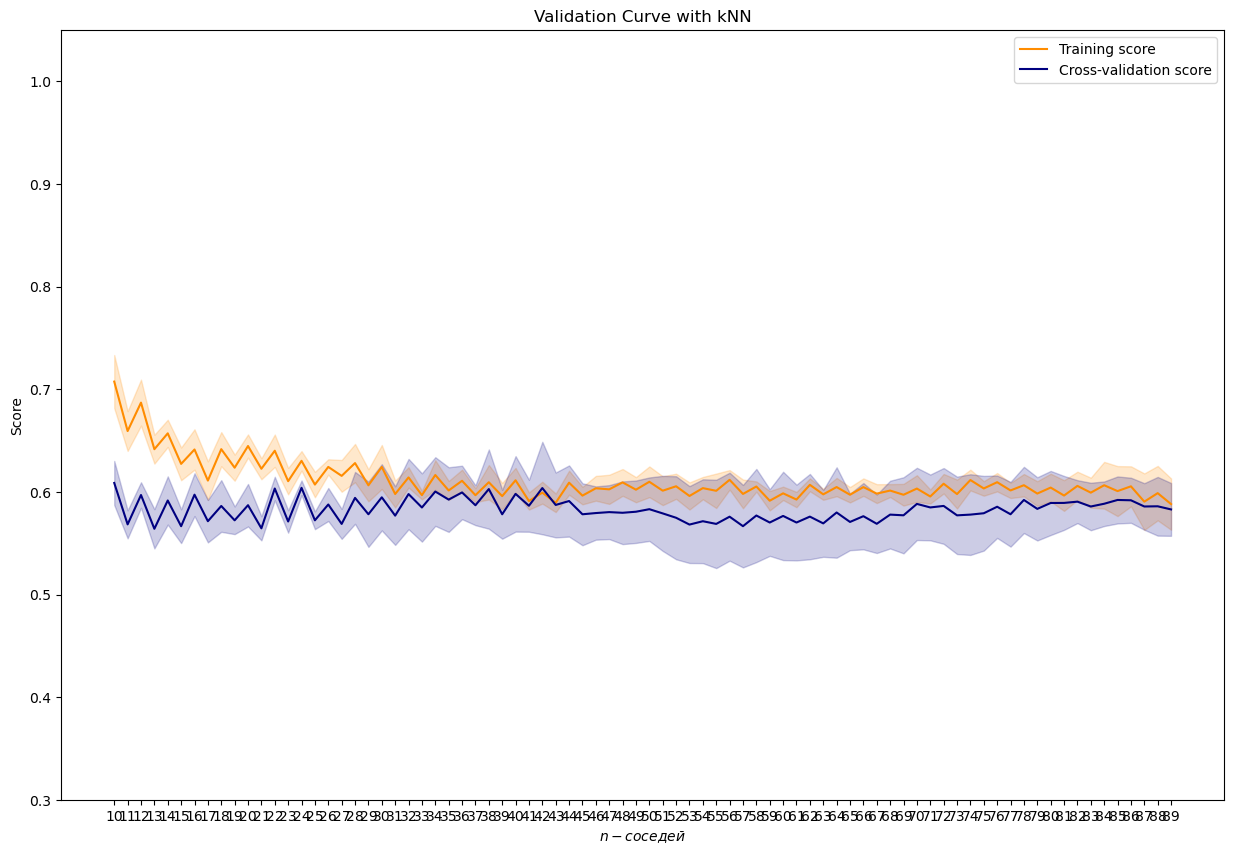

In [145]:
n_range = np.arange(10,90)

train_scores, test_scores = validation_curve(
    KNeighborsClassifier(), X_train, y_train,
    param_name="n_neighbors", 
    param_range=n_range,
    cv = ShuffleSplit(test_size = .3, train_size = .6, n_splits = 5, random_state = 42), 
    scoring="precision", 
    n_jobs=-1)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure(figsize=(15,10))

plt.title("Validation Curve with kNN")
plt.xlabel("$n-соседей$")
plt.ylabel("Score")
plt.ylim(0.3, 1.05)

plt.plot(n_range, train_scores_mean, label="Training score", color="darkorange")
plt.fill_between(n_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange")
plt.plot(n_range, test_scores_mean, label="Cross-validation score",
             color="navy")
plt.fill_between(n_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy")

plt.legend(loc="best")
plt.xticks(n_range)
plt.show()

In [ ]:
#наивный байес через Бернулли потому что вы сказали, что наш скор не должен быть меньше скора наивеого Байеса, а Бернулли потому что бинарные данные
model_NB = make_pipeline(Normalizer(),BernoulliNB())
model_NB.fit(X_train,y_train)
y_NB_pred = model_NB.predict(X_test)
y_NB_pred

In [ ]:
#nb через Бернулли
def plot_roc_auc_multi_OvR(model, X_train=np.array(X_train), X_test=np.array(X_test), 
                       y_train=np.array(y_train), y_test=np.array(y_test),
                       figsize = (12, 8)
                      ):
    
    plt.figure(figsize = figsize)
    bins = np.linspace(0,1,21)
    classes = model.classes_
    cl_len = len(classes)
    for i in classes:
        # Gets the class
        c = classes[i]

        
        df_aux = pd.DataFrame(X_test).copy()
        df_aux['class'] = [1 if y == c else 0 for y in y_test]
        df_aux['prob'] = model.predict_proba(X_test)[:, i]
        df_aux = df_aux.reset_index(drop = True)

       
        ax = plt.subplot(2, cl_len, i+1)
        sns.histplot(x = "prob", data = df_aux, hue = 'class', color = 'b', ax = ax, bins = bins)
        ax.set_title(c)
        ax.legend([f"Class: {c}", "Rest"])
        ax.set_xlabel(f"P(x = {c})")

        
        roc_auc_ovr = roc_auc_score(df_aux['class'], df_aux['prob'])

       
        ax_bottom = plt.subplot(2, cl_len, i+cl_len+1)
        fpr, tpr, _ = roc_curve(df_aux['class'], df_aux['prob'])
        ax_bottom.plot(fpr, tpr, label='AUC %.5f'%roc_auc_ovr)
        ax_bottom.set_title("ROC Curve OvR")
        plt.xlabel("False Positive Rate")
        plt.ylabel("True Positive Rate")
        ax_bottom.legend()
    plt.tight_layout()